<a href="https://colab.research.google.com/github/olabe3/NeuralNetworks/blob/master/3rd_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
input_size = 784
output_classes = 10
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learining_rate = 0.01
momentum = 0.5
log_interval = 10

#Load the Data

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

In [7]:
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files',train=True, download=True,transform=transform),batch_size=batch_size_train,shuffle=True)

In [8]:
test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files',train=False, download=True,transform=transform),batch_size=batch_size_test,shuffle=True)

In [9]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [12]:
print(example_data.shape)

torch.Size([64, 1, 28, 28])


In [14]:
import matplotlib.pyplot as plt

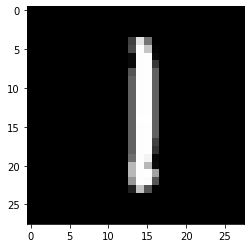

In [20]:
plt.imshow(example_data[0][0], cmap = 'gray')

In [21]:
print(example_targets)

tensor([1, 9, 0, 8, 0, 0, 3, 6, 8, 1, 4, 4, 4, 8, 0, 7, 0, 7, 5, 0, 9, 4, 9, 5,
        9, 0, 2, 9, 2, 7, 8, 7, 0, 5, 2, 2, 8, 1, 2, 6, 9, 5, 2, 8, 4, 6, 1, 8,
        8, 9, 7, 1, 0, 0, 2, 8, 5, 1, 1, 5, 6, 0, 3, 6])


# Defined Network

In [22]:
import torch.nn.functional as F
import torch.optim as optim

In [23]:
class MNIST(nn.Module):
  def __init__(self):
    super(MNIST, self).__init__()
    self.fc1 = nn.Linear(input_size, 1024)
    self.fc2 = nn.Linear(1024, 2048)
    self.fc3 = nn.Linear(2048, output_classes)
  def forward(self,x):
    x = x.view(-1, input_size)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x)

In [25]:
net = MNIST
print(net)

<class '__main__.MNIST'>


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

TypeError: ignored

In [27]:
train_losses = []

In [28]:
for epoch in range(1, n_epochs + 1):
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()

    #forward prop
    output = net(data)

    #calc loss
    loss = criterion(output, target)

    #back prop
    loss.backward()

    #optimize out parameters
    optimizer.step()

    if batch_idx % log_interval == 0:
      print('Train Epoch: ' + str(epoch) + " batch_idx: " + str(batch_idx) + "\tLoss: " + str(loss.item()))

NameError: ignored